In [1]:
import time
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def loadData(fileNameStr):
    df = pd.read_csv(fileNameStr,sep=' ', header=None)
    df.columns = ['cityNumber', 'x', 'y']
    xs = df.x
    ys = df.y
    return xs, ys

In [3]:
xs, ys = loadData('Qatar_194_coordinates.tsp')
numPoints = len(xs)

In [4]:
#function used to build the distance matrix
def distance(point1, point2):
    return np.sqrt(sum((point1-point2)**2))

def createDistanceMatrix(xs, ys):
    numPoints = len(xs)
    dists = np.ndarray((numPoints,numPoints))
    for i in range(numPoints):
        dists[i,i] = 0
        for j in range(i+1,numPoints):
            dists[i,j] = distance(np.array([xs[i],ys[i]]), np.array([xs[j],ys[j]]))
            dists[j,i] = dists[i,j]   
    return dists

In [5]:
dists = createDistanceMatrix(xs, ys)

In [6]:
def routeLength(path, distancesMatrix):
    curLength = distancesMatrix[0,path[0]]
    for i in range(len(path)-1):
        curLength += distancesMatrix[path[i], path[i+1]]
    curLength += distancesMatrix[path[-1],0]
    return curLength

In [7]:
curPath = np.array([i for i in range(1,numPoints)])
curLength = routeLength(curPath, dists)
print(curPath)
print(curLength)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193]
39555.63359710213


In [8]:
def computeBestPath(xs, ys):

    g = np.array([np.mean(xs),np.mean(ys)])  # center of gravity
    path = []     #points used in the path
    path_x = []   #x values of points, used to update g
    path_y = []   #y values of points, used to update
    outstanding = [i for i in range(numPoints)] 

    # find 3 closest points to g
    sortedOutstanding = sorted(outstanding, key = lambda i: distance(g,np.array([xs[i],ys[i]])))
    for i in range(3):
        path.append(sortedOutstanding[i])
        path_x.append(xs[sortedOutstanding[i]])
        path_y.append(ys[sortedOutstanding[i]])

    #remove from sortedOutstanding by value
    for i in range(3):
        outstanding.remove(path[i])

    for count in range(0, numPoints-3):
    #for count in range(0, 1):    
        g = np.array([np.mean(path_x),np.mean(path_y)])
        #find closest point to g in list of outstanding points
        minDist = distance(g,np.array([xs[outstanding[0]],ys[outstanding[0]]]))
        minPos = 0
        for i in range(1, len(outstanding)):
            compDist = distance(g,np.array([xs[outstanding[i]],ys[outstanding[i]]]))
            if compDist < minDist:
                minDist = compDist
                minPos = i
        pNewName = outstanding[minPos]
        pNew = np.array([xs[pNewName],ys[pNewName]])

        p = np.array([xs[path[-1]],ys[path[-1]]])
        pNext = np.array([xs[path[0]],ys[path[0]]])
        minDist = distance(pNew,p) + distance(pNew,pNext) - distance(p, pNext)
        minPos = -1
        for i in range(len(path)-1):
            p = np.array([xs[path[i]],ys[path[i]]])
            pNext = np.array([xs[path[i+1]],ys[path[i+1]]])
            compDist = distance(pNew,p) + distance(pNew,pNext) - distance(p, pNext)
            if compDist < minDist:
                minDist = compDist
                minPos = i
        path.insert(minPos+1, pNewName)
        path_x.append(xs[pNewName])
        path_y.append(ys[pNewName])
        outstanding.remove(pNewName)

    zeroPos = path.index(0)
    res = path[zeroPos+1:] + path[:zeroPos]
        
    return res

In [9]:
startTime = time.time()
bestPathTest = computeBestPath(xs, ys)
endTime = time.time()
runTime = endTime - startTime
print(runTime)
bestPathLength = routeLength(bestPathTest, dists)

1.1312339305877686


In [10]:
print(bestPathTest)
print(bestPathLength)

[1, 2, 6, 16, 20, 17, 27, 21, 28, 56, 44, 82, 78, 80, 69, 63, 67, 65, 36, 26, 11, 8, 9, 4, 14, 18, 38, 50, 46, 33, 39, 42, 37, 40, 45, 47, 43, 30, 31, 29, 34, 41, 49, 48, 54, 53, 51, 52, 55, 57, 60, 66, 72, 76, 83, 91, 96, 99, 109, 111, 114, 122, 123, 127, 119, 132, 142, 147, 134, 128, 135, 130, 120, 116, 115, 117, 121, 164, 173, 172, 174, 185, 186, 189, 193, 182, 183, 188, 191, 190, 187, 192, 176, 180, 177, 179, 167, 169, 184, 170, 166, 158, 157, 161, 165, 159, 154, 150, 146, 151, 140, 143, 152, 149, 156, 153, 138, 137, 118, 107, 106, 104, 105, 102, 101, 108, 112, 113, 125, 124, 136, 141, 145, 163, 178, 171, 181, 175, 168, 162, 160, 155, 148, 144, 139, 133, 131, 126, 129, 110, 103, 100, 98, 93, 97, 85, 84, 64, 19, 89, 88, 81, 61, 62, 35, 58, 79, 86, 90, 92, 94, 95, 87, 77, 74, 75, 70, 71, 73, 68, 59, 32, 25, 23, 24, 22, 15, 5, 7, 12, 13, 10, 3]
12060.236506070274


In [11]:
def visualiseRoute(xs, ys, path, routeLength):
    fig, ax = plt.subplots(1,1)
    dash = [5, 5]
    #ax.scatter([-5,5],[-5,5], visible=False)
    ax.scatter(xs[0],ys[0], color='black')
    ax.scatter(xs[1:], ys[1:], color='blue')
    ax.plot([xs[0],xs[path[0]]],[ys[0],ys[path[0]]], color='red', dashes=dash)
    for i in range(numPoints-2):
        ax.plot([xs[path[i]],xs[path[i+1]]],[ys[path[i]],ys[path[i+1]]], color='red', dashes=dash)
    ax.plot([xs[0],xs[path[-1]]],[ys[0],ys[path[-1]]], color='red', dashes=dash)    
    ax.set_title('Route length: {:.3}'.format(routeLength))

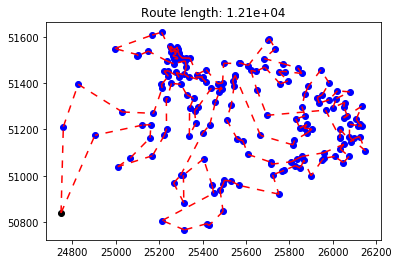

In [12]:
visualiseRoute(xs, ys, bestPathTest, bestPathLength)

GA

In [13]:
from jmetal.algorithm.singleobjective.genetic_algorithm import GeneticAlgorithm
from jmetal.operator import BinaryTournamentSelection
from jmetal.operator.crossover import PMXCrossover
from jmetal.operator.mutation import PermutationSwapMutation
from jmetal.problem.singleobjective.tsp import TSP
from jmetal.util.comparator import MultiComparator
from jmetal.util.density_estimator import CrowdingDistance
from jmetal.util.ranking import FastNonDominatedRanking
from jmetal.util.termination_criterion import StoppingByEvaluations
from jmetal.core.solution import PermutationSolution

In [14]:
class myTSP(TSP):
    def __init__(self, distMatrix, numPoints ):
        super(TSP, self).__init__()

        self.distance_matrix = distMatrix

        self.obj_directions = [self.MINIMIZE]
        self.number_of_variables = numPoints
        self.number_of_objectives = 1
        self.number_of_constraints = 0
    

In [15]:
def reformatGASolution(gaSol):
    zeroPos = gaSol.index(0)
    formatgaSol=[]
    for i in range(zeroPos+1,numPoints):
        formatgaSol.append(gaSol[i])
    for i in range(0,zeroPos):
        formatgaSol.append(gaSol[i])
    return formatgaSol

In [16]:
problem = myTSP(dists, numPoints)

maxGen = 120
popSize = 100
offSpringSize = 100

algorithm = GeneticAlgorithm(
    problem=problem,
    population_size=popSize,
    offspring_population_size=offSpringSize,
    mutation=PermutationSwapMutation(1.0 / problem.number_of_variables),
    crossover=PMXCrossover(0.7),
    selection=BinaryTournamentSelection(
    MultiComparator([FastNonDominatedRanking.get_comparator(),
                                 CrowdingDistance.get_comparator()])),
    termination_criterion=StoppingByEvaluations(max=maxGen*(popSize+offSpringSize))
    )

algorithm.run()
result = algorithm.get_result()
gaSol = reformatGASolution(result.variables)
print('GA Solution')
print('Solution: {}'.format(gaSol))
print('Fitness: {}'.format(result.objectives[0]))
print('Computing time: {}'.format(algorithm.total_computing_time))

print('\nBest Solution')
print('best Path: {}'.format(bestPathTest))
print('best Path: {}'.format(bestPathLength))


GA Solution
Solution: [7, 133, 131, 17, 58, 160, 193, 183, 163, 13, 57, 144, 103, 170, 164, 142, 128, 159, 132, 185, 179, 138, 149, 124, 172, 89, 24, 111, 104, 112, 97, 62, 31, 55, 34, 127, 21, 110, 84, 74, 90, 171, 161, 113, 150, 155, 182, 169, 158, 166, 107, 86, 143, 140, 4, 48, 66, 71, 14, 77, 82, 47, 67, 130, 78, 99, 117, 122, 79, 70, 187, 184, 180, 154, 162, 88, 72, 168, 125, 100, 35, 19, 61, 51, 80, 9, 26, 46, 50, 134, 41, 68, 2, 15, 29, 69, 165, 108, 115, 156, 59, 96, 23, 87, 181, 178, 148, 153, 95, 102, 147, 135, 188, 177, 152, 146, 105, 73, 8, 141, 175, 85, 81, 136, 145, 106, 65, 10, 3, 5, 30, 32, 56, 118, 123, 116, 6, 91, 109, 12, 64, 42, 22, 121, 98, 151, 53, 33, 27, 40, 28, 60, 18, 44, 52, 139, 129, 75, 83, 11, 49, 38, 36, 20, 54, 94, 63, 114, 173, 137, 93, 126, 189, 174, 120, 186, 190, 92, 25, 16, 45, 43, 39, 176, 167, 119, 76, 157, 192, 191, 37, 101, 1]
Fitness: 61331.64218123216
Computing time: 15.885765314102173

Best Solution
best Path: [1, 2, 6, 16, 20, 17, 27, 21, 28

Alternative GA

In [17]:
from sklearn.cluster import KMeans

In [25]:
numClusters = 70
kmeans = KMeans(n_clusters=numClusters, random_state=0).fit(np.column_stack((xs,ys)))
xList = []
yList = []
nameList = []
for i in range(numClusters):
    xList.append([])
    yList.append([])
    nameList.append([])
    
for i in range(numPoints):
    groupNum = kmeans.labels_[i]
    xList[groupNum].append(xs[i])
    yList[groupNum].append(ys[i]) 
    nameList[groupNum].append(i)

print('smallest group: {}'.format(min([len(xi) for xi in xList])))
print('biggest group: {}'.format(max([len(xi) for xi in xList])))


smallest group: 1
biggest group: 19


In [26]:
def visualiseGroups(xList, yList):
    fig, ax = plt.subplots(1,1)
    for i in range(len(xList)):
        ax.scatter(xList[i], yList[i])

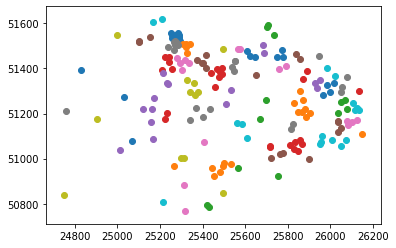

In [27]:
visualiseGroups(xList,yList)

In [111]:
def TSP_exhaustiveSolve(dists):
    # the starting point is assumed to be p_O.
    # a path is then just a permutation of points 1,2,...,n
    # If we had considered permutations of 0,1,2,...n we would consider the same path several times
    # as 0,1,2,...,n is equivalent to 3,4,...,n,0,1,2
    # so starting from 0 reduces the number of permutations we need to consider
    
    # Further optimisation is possible since paths 0,1,2,...,n and 0,n,n-1,...,2,1 are equivalent
    
    # if we had allowed any point to be the starting point
    timeStart = time.time()
    numPoints = dists.shape[0]
    bestPath = [i for i in range(1, numPoints)]
    bestPathLength = routeLength(bestPath, dists)
    permIter = itertools.permutations(bestPath)
    allPaths = []
    keepLoop = True
    while keepLoop:
        try:
            checkPath = next(permIter)
            checkPathLength = routeLength(checkPath, dists)
            allPaths.append(checkPathLength)
            if checkPathLength < bestPathLength:
                bestPathLength = checkPathLength
                bestPath = [el for el in checkPath]
        except StopIteration:
            keepLoop = False
    timeEnd = time.time()
    timeLength = timeEnd-timeStart
    
    return bestPath, bestPathLength, timeLength

In [112]:
#exhaustive search TSP for each subgroup. Could be parallelised

distMatrices = []
optimalSubPaths = []
optimalSubLengths = []
for i in range(numClusters):
    distMat = createDistanceMatrix(xList[i], yList[i])
    optimalSubPath, optimalSubLength, runDuration = TSP_exhaustiveSolve(distMat)
    optimalSubPaths.append(optimalSubPath)
    optimalSubLengths.append(optimalSubLength)

In [113]:
def visualiseSubPaths(xList, yList, optimalSubPaths):
    fig, ax = plt.subplots(1,1)
    
    #ax.scatter([-5,5],[-5,5], visible=False)
    for i in range(len(xList)):
        xs = xList[i]
        ys = yList[i]
        numPoints = len(xs)
        path = optimalSubPaths[i]
        ax.scatter(xs, ys, color='blue')
        ax.plot([xs[0],xs[path[0]]],[ys[0],ys[path[0]]], color='red')
        for i in range(numPoints-2):
            ax.plot([xs[path[i]],xs[path[i+1]]],[ys[path[i]],ys[path[i+1]]], color='red')
        ax.plot([xs[0],xs[path[-1]]],[ys[0],ys[path[-1]]], color='red')
    

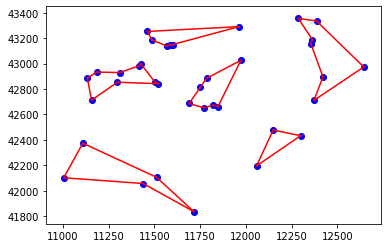

In [114]:
visualiseSubPaths(xList, yList, optimalSubPaths)

In [115]:
class myTSP2(TSP):
    def __init__(self, distMatrix, numPoints, nameList):
        super(TSP, self).__init__()

        self.distance_matrix = distMatrix
        self.name_list = nameList

        self.obj_directions = [self.MINIMIZE]
        self.number_of_variables = numPoints
        self.number_of_objectives = 1
        self.number_of_constraints = 0
    
    def create_solution(self) -> PermutationSolution:
        # The idea is to reuse subsequences obtained from piecewise optimisation performed 
        # on subgroups obtained via kmeans, so that the initial population has 
        # some preoptimised sequences and convergence might be quicker.
        # global recombination from optimised sequences done at random
        # can be improved
        
        new_solution = PermutationSolution(number_of_variables=self.number_of_variables,
                                           number_of_objectives=self.number_of_objectives)
        #new_solution.variables = random.sample(range(self.number_of_variables), k=self.number_of_variables)
        
        randShuf = np.arange(len(self.name_list))
        np.random.shuffle(randShuf)
        
        #sampleSol = [pt for pt in nameList[el] for el in randShuf]
        sampleSol = []
        for el in randShuf:
            seq = nameList[el]
            for pt in seq:
                sampleSol.append(pt)
        new_solution.variables = sampleSol
        
        return new_solution

GA Solution
Solution: [9, 13, 20, 28, 29, 31, 34, 32, 33, 30, 35, 37, 36, 26, 10, 11, 15, 18, 17, 16, 2, 4, 3, 5, 6, 7, 8, 12, 14, 19, 22, 24, 25, 27, 23, 21, 1]
Best Path: 8459.391390776564
Computing time: 2.298797607421875


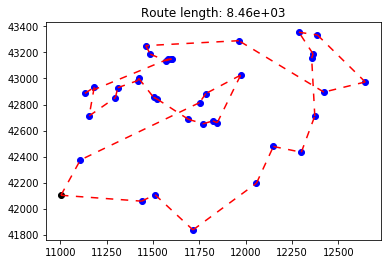

In [118]:
problem = myTSP2(dists, numPoints, nameList)

maxGen = 60
popSize = 200
offSpringSize = 200

algorithm = GeneticAlgorithm(
    problem=problem,
    population_size=popSize,
    offspring_population_size=offSpringSize,
    mutation=PermutationSwapMutation(1.0 / problem.number_of_variables),
    crossover=PMXCrossover(0.8),
    selection=BinaryTournamentSelection(
    MultiComparator([FastNonDominatedRanking.get_comparator(),
                                 CrowdingDistance.get_comparator()])),
    termination_criterion=StoppingByEvaluations(max=maxGen*(popSize+offSpringSize))
    )

algorithm.run()
result = algorithm.get_result()
gaSol = reformatGASolution(result.variables)
IGA_bestPath = result.objectives[0]
print('GA Solution')
print('Solution: {}'.format(gaSol))
print('Best Path: {}'.format(IGA_bestPath))
print('Computing time: {}'.format(algorithm.total_computing_time))

visualiseRoute(xs, ys, gaSol, result.objectives[0])